<h1>Does Coal Usage Decrease as GDP Increases?</h1>

<h2><font color = "Red">Import Libraries</font> </h2>

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

<h2> <font color = "Red">Read Data</font></h2>

In [3]:
raw_data = pd.read_csv('./world-development-indicators/Indicators.csv')

<h2><font color = "Red">Create Calls </font> </h2>

In [4]:
coal_call = "Electricity production from coal sources"

oil_call = "Electricity production from oil sources"

hydro_call = "Electricity production from hydroelectric sources"

natural_gas_call = "Electricity production from natural gas sources"

nuclear_call = "Electricity production from nuclear sources"

renewable_call = "Electricity production from renewable sources, excluding hydroelectric \(% of"

GDP_call = "GDP per capita \(constant 2005"

GDP_growth_call = "GDP growth \(annual"

coal_rent_call = "Coal rents"

consumption_call = "Energy use \(kg of oil equivalent per capita"

energy_import_call = "Energy imports, net \(% of energy"

science_call = "Scientific and technical journal artic"

emissions_call = "CO2 emissions \(metric tons" 

<h2><font color = "Red">Create Functions</font> </h2>

In [5]:
def create_mask(energy, country):
    data = raw_data["IndicatorName"].str.contains(energy)
    nation = raw_data["CountryCode"].str.contains(country)
    return raw_data[data & nation]

In [6]:
def remove_mask(data, country):
    return data[data["CountryCode"] != country]

In [7]:
def correlation(data1, data2):
    return np.corrcoef(data1['Value'].values, data2['Value'].values)

In [8]:
def data_trunc_below_year(data, year):
    return data[data['Year'] < year]

In [9]:
def data_trunc_above_year(data, year):
    return data[data['Year'] > year]

In [150]:
def scatter(data1, data2, title, filename):
    fig, axis = plt.subplots()
    # Grid lines, Xticks, Xlabel, Ylabel

    axis.yaxis.grid(True)
    axis.set_title(title, fontsize=10)
    axis.set_xlabel(data1['IndicatorName'].iloc[0],fontsize=10)
    axis.set_ylabel(data2['IndicatorName'].iloc[0],fontsize=10)

    X = data1['Value']
    Y = data2['Value']

    axis.scatter(X, Y)
    plt.savefig(filename)

<h2><font color="Red">World GDP vs Coal</font></h2>

In [11]:
#World Masks
World_GDP = create_mask(GDP_call, "WLD")
World_coal = create_mask(coal_call, "WLD")
World_oil = create_mask(oil_call, "WLD")
World_hydro = create_mask(hydro_call, "WLD")
World_nuclear = create_mask(nuclear_call, "WLD")
World_natural_gas = create_mask(natural_gas_call, "WLD")
World_renewable = create_mask(renewable_call, 'WLD')
World_consumption = create_mask(consumption_call, "WLD")
World_articles = create_mask(science_call, "WLD")
World_CO2_emissions = create_mask(emissions_call, "WLD")

<h2><font color = "Blue">Energy Usage Worldwide</font></h2>

In [185]:
#Graph of Worldwide energy usage
# Line plot of energy usage worldwide
plt.plot(World_coal['Year'].values, World_coal['Value'].values, 'r-', label="Coal")
plt.plot(World_nuclear['Year'].values, World_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(World_oil['Year'].values, World_oil['Value'].values, 'k-', label="Oil")
plt.plot(World_hydro['Year'].values, World_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(World_natural_gas['Year'].values, World_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(World_renewable['Year'].values, World_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.ylabel("Percentage of energy use")
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in the World')

# to make more honest, start they y axis at 0
plt.axis([1971, 2012,0,100])
#plt.show()
plt.savefig("energy_usage_worldwide.png")

<p>Coal is a larger portion of energy usage worldwide today than it was 30 years ago. This is a surprising result!</p>

<h2><font color = "Blue">Energy Usage GDP and Energy Correlations</font></h2>


In [13]:
#Truncate GDP data, so it is same length as coal data
World_GDP_trunc = data_trunc_above_year(World_GDP, 1970)
World_GDP_trunc = data_trunc_below_year(World_GDP_trunc, 2013)

In [151]:
scatter(World_GDP_trunc, World_coal, "World GDP per capita vs Coal Usage", "GDP_coal_worldwide.png")

In [15]:
correlation(World_coal, World_GDP_trunc)

array([[ 1.        ,  0.94738912],
       [ 0.94738912,  1.        ]])

<p>Higher GDP is positively, not negatively, correlated coal usage!</p>

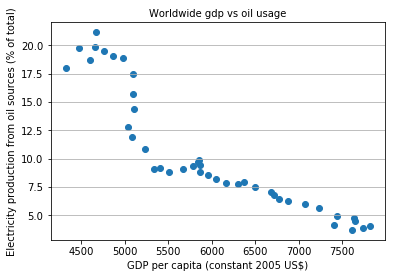

In [16]:
scatter(World_GDP_trunc, World_oil, "Worldwide gdp vs oil usage", "World_oil_gdp.png")

In [17]:
correlation(World_GDP_trunc, World_oil)

array([[ 1.        , -0.90409974],
       [-0.90409974,  1.        ]])

<p>But GDP is negatively correlated with oil!</p>

In [18]:
correlation(World_GDP_trunc, World_hydro)

array([[ 1.        , -0.86699713],
       [-0.86699713,  1.        ]])

In [19]:
correlation(World_GDP_trunc, World_nuclear)

array([[ 1.        ,  0.60998358],
       [ 0.60998358,  1.        ]])

In [20]:
correlation(World_GDP_trunc, World_renewable)

array([[ 1.        ,  0.90847105],
       [ 0.90847105,  1.        ]])

In [21]:
correlation(World_GDP_trunc, World_natural_gas)

array([[ 1.       ,  0.9342586],
       [ 0.9342586,  1.       ]])

<p>Of all the energy sources, coal is the most correlated with GDP. Renewables and natural gas are close. Nuclear is not far behind. Hydroelectric power and oil actually have negative correlations.</p>

<h2><font color = "Blue">Energy Usage Energy vs Consumption Correlations</font></h2>


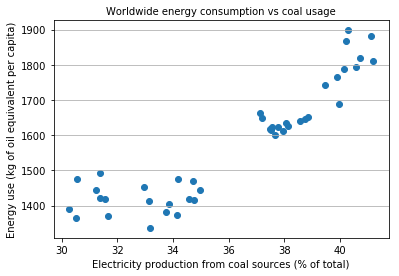

In [22]:
scatter(World_coal, World_consumption, "Worldwide energy consumption vs coal usage", "World_consumption_coal.png")

In [23]:
correlation(World_coal, World_consumption)

array([[ 1.        ,  0.91328393],
       [ 0.91328393,  1.        ]])

<p>Higher consumption of energy is also correlated with coal usage!</p>

In [24]:
correlation(World_oil, World_consumption)

array([[ 1.        , -0.81358969],
       [-0.81358969,  1.        ]])

In [25]:
correlation(World_hydro, World_consumption)

array([[ 1.        , -0.77134061],
       [-0.77134061,  1.        ]])

In [26]:
correlation(World_nuclear, World_consumption)

array([[ 1.        ,  0.55173352],
       [ 0.55173352,  1.        ]])

In [27]:
correlation(World_renewable, World_consumption)

array([[ 1.        ,  0.91530251],
       [ 0.91530251,  1.        ]])

In [28]:
correlation(World_natural_gas, World_consumption)

array([[ 1.        ,  0.95337607],
       [ 0.95337607,  1.        ]])

<p>For the most part, the same relationship holds when comparing energy usage vs consumption. However, when compared to consumption, both renewable fuels and natural gas actually have stronger correlations then coal.</p>

<h2><font color="blue">Coal substitutes and complements worldwide</font></h2>

In [29]:
correlation(World_natural_gas, World_coal)

array([[ 1.        ,  0.91951426],
       [ 0.91951426,  1.        ]])

In [30]:
correlation(World_renewable, World_coal)

array([[ 1.        ,  0.82610138],
       [ 0.82610138,  1.        ]])

In [31]:
correlation(World_nuclear, World_coal)

array([[ 1.        ,  0.72813613],
       [ 0.72813613,  1.        ]])

In [32]:
correlation(World_hydro, World_coal)

array([[ 1.       , -0.7702959],
       [-0.7702959,  1.       ]])

In [33]:
correlation(World_oil, World_coal)

array([[ 1.        , -0.94305456],
       [-0.94305456,  1.        ]])

<p>At the world level only hydroelectric power and oil are substitutes for coal. Everything else is a complement</p>

<h2><font color = "Blue">Energy Usage vs Published Articles Correlations</font></h2>
<p>Does scientific research make a difference in coal usage?<p>


In [34]:
World_coal_trunc = data_trunc_above_year(World_coal, 1984)

In [35]:
World_coal_trunc = data_trunc_below_year(World_coal_trunc, 2012)

In [36]:
World_articles_trunc = data_trunc_above_year(World_articles, 1984)

In [37]:
correlation(World_articles_trunc, World_coal_trunc)

array([[ 1.        ,  0.94860611],
       [ 0.94860611,  1.        ]])

<p>Again, a strong relationship between published articles and coal growth. Let us examine this more closely. <p>

In [38]:
all_articles = raw_data[raw_data['IndicatorName'].str.contains(science_call)]

In [39]:
#remove multiple countries
all_articles = remove_mask(all_articles, "WLD")
all_articles = remove_mask(all_articles, "NAC")
all_articles = remove_mask(all_articles, "ARB")
all_articles = remove_mask(all_articles, "CEB")
all_articles = remove_mask(all_articles, "CSS")
all_articles = remove_mask(all_articles, "EAP")
all_articles = remove_mask(all_articles, "EAS")
all_articles = remove_mask(all_articles, "ECA")
all_articles = remove_mask(all_articles, "ECS")
all_articles = remove_mask(all_articles, "EUU")
all_articles = remove_mask(all_articles, "FCS")
all_articles = remove_mask(all_articles, "HIC")
all_articles = remove_mask(all_articles, "HPC")
all_articles = remove_mask(all_articles, "LAC")
all_articles = remove_mask(all_articles, "LMC")
all_articles = remove_mask(all_articles, "LMY")
all_articles = remove_mask(all_articles, "MEA")
all_articles = remove_mask(all_articles, "MNA")
all_articles = remove_mask(all_articles, "NOC")
all_articles = remove_mask(all_articles, "OEC")
all_articles = remove_mask(all_articles, "OED")
all_articles = remove_mask(all_articles, "PSS")
all_articles = remove_mask(all_articles, "SSA")
all_articles = remove_mask(all_articles, "SSD")
all_articles = remove_mask(all_articles, "SSF")
all_articles = remove_mask(all_articles, "SST")
all_articles = remove_mask(all_articles, "UMC")
all_articles = remove_mask(all_articles, "EMU")
all_articles = remove_mask(all_articles, "MIC")



In [40]:
df = all_articles.groupby(['Year', "CountryName"])['Value'].max()

In [41]:
year = 1985
most_articles = {}
while year < 2012:
    most_articles[year] = (df[year].argmax())
    year += 1
    
print(most_articles)

{1985: 'United States', 1986: 'United States', 1987: 'United States', 1988: 'United States', 1989: 'United States', 1990: 'United States', 1991: 'United States', 1992: 'United States', 1993: 'United States', 1994: 'United States', 1995: 'United States', 1996: 'United States', 1997: 'United States', 1998: 'United States', 1999: 'United States', 2000: 'United States', 2001: 'United States', 2002: 'United States', 2003: 'United States', 2004: 'United States', 2005: 'United States', 2006: 'United States', 2007: 'United States', 2008: 'United States', 2009: 'United States', 2010: 'China', 2011: 'China'}


<p>Articles are dominated by the United States and China. We will compare these two giants later. <p>

In [42]:
USA_Articles = create_mask(science_call, "USA")

In [43]:
USA_Articles_trunc = data_trunc_above_year(USA_Articles, 1984)

In [44]:
China_Articles = create_mask(science_call, "CHN")

In [45]:
China_Articles_trunc = data_trunc_above_year(China_Articles, 1984)

In [46]:
USA_articles_trunc = USA_Articles_trunc.set_index(USA_Articles_trunc['Year'])

In [47]:
China_articles_trunc = China_Articles_trunc.set_index(China_Articles_trunc['Year'])

In [48]:
World_articles_trunc = World_articles_trunc.set_index(World_articles_trunc['Year'])
(China_articles_trunc['Value'] + USA_articles_trunc["Value"]) / World_articles_trunc['Value']

Year
1985    0.386921
1986    0.421926
1987    0.419982
1988    0.416409
1989    0.412139
1990    0.412736
1991    0.410507
1992    0.396921
1993    0.376985
1994    0.364431
1995    0.356855
1996    0.348584
1997    0.341631
1998    0.337506
1999    0.332375
2000    0.333526
2001    0.334872
2002    0.333316
2003    0.338802
2004    0.342601
2005    0.346076
2006    0.348365
2007    0.350158
2008    0.353686
2009    0.356965
2010         NaN
2011         NaN
Name: Value, dtype: float64

In [49]:
World_articles_trunc = data_trunc_below_year(World_articles_trunc, 2010)

In [50]:
correlation(World_articles_trunc, USA_articles_trunc)

array([[ 1.        ,  0.81198823],
       [ 0.81198823,  1.        ]])

<h2><font color = "blue">What is the relationship between CO2 emissions and coal usage?</font></h2>

In [51]:
World_CO2_emissions_trunc = data_trunc_above_year(World_CO2_emissions, 1970)

In [52]:
World_coal_emissions_trunc = data_trunc_below_year(World_coal, 2012)

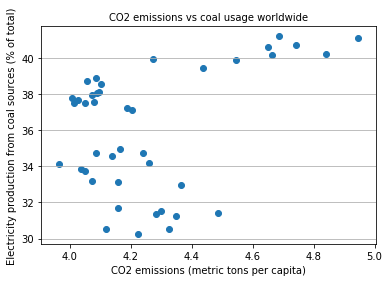

In [53]:
scatter(World_CO2_emissions_trunc, World_coal_emissions_trunc, "CO2 emissions vs coal usage worldwide", "CO2_emissions_coal_world.png")

In [54]:
correlation(World_CO2_emissions_trunc, World_coal_emissions_trunc)

array([[ 1.       ,  0.3813054],
       [ 0.3813054,  1.       ]])

<p>The relationship between CO2 emissions and coal usage as a percentage of total energy is not very strong worldwide<p>

<h2><font color = "Red">Segmenting High and Low Income</font></h2>

In [55]:
#create high income masks
High_income_GDP = create_mask(GDP_call, "HIC")
High_income_coal = create_mask(coal_call, "HIC")
High_income_oil = create_mask(oil_call, "HIC")
High_income_hydro = create_mask(hydro_call, "HIC")
High_income_nuclear = create_mask(nuclear_call, "HIC")
High_income_natural_gas = create_mask(natural_gas_call, "HIC")
High_income_renewable = create_mask(renewable_call, 'HIC')
High_income_consumption = create_mask(consumption_call, "HIC")
High_income_CO2_emissions = create_mask(emissions_call, "HIC")
High_income_articles = create_mask(science_call, "HIC")

In [56]:
#create low and middle income masks
Low_income_GDP = create_mask(GDP_call, "LMY")
Low_income_coal = create_mask(coal_call, "LMY")
Low_income_oil = create_mask(oil_call, "LMY")
Low_income_hydro = create_mask(hydro_call, "LMY")
Low_income_nuclear = create_mask(nuclear_call, "LMY")
Low_income_natural_gas = create_mask(natural_gas_call, "LMY")
Low_income_renewable = create_mask(renewable_call, "LMY")
Low_income_consumption = create_mask(consumption_call, "LMY")
Low_income_CO2_emissions = create_mask(emissions_call, "LMY")
Low_income_articles = create_mask(science_call, "LMY")

<h2><font color = "blue">Energy Usage in High Income Countries</font></h2>

In [188]:
#Graph of High income energy usage
# Line plot of energy usage in high income countries
plt.plot(High_income_coal['Year'].values, High_income_coal['Value'].values, 'r-', label="Coal")
plt.plot(High_income_nuclear['Year'].values, High_income_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(High_income_oil['Year'].values, High_income_oil['Value'].values, 'k-', label="Oil")
plt.plot(High_income_hydro['Year'].values, High_income_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(High_income_natural_gas['Year'].values, High_income_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(High_income_renewable['Year'].values, High_income_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.ylabel("Market share by energy source")
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in the High Income Countries')

# to make more honest, start they y axis at 0
plt.axis([1971, 2012,0,100])
#plt.show()
plt.savefig("HIC_energy_marketshare.png")

<p> High income countries are actually using less coal and more natural gas! This is very different from the world at large</p>

<h2><font color="blue">Energy Usage in Low Income Countries</font></h2>

In [158]:
# Line plot of energy usage in Lower and middle income countries
plt.plot(Low_income_coal['Year'].values, Low_income_coal['Value'].values, 'r-', label="Coal")
plt.plot(Low_income_nuclear['Year'].values, Low_income_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(Low_income_oil['Year'].values, Low_income_oil['Value'].values, 'k-', label="Oil")
plt.plot(Low_income_hydro['Year'].values, Low_income_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(Low_income_natural_gas['Year'].values, Low_income_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(Low_income_renewable['Year'].values, Low_income_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.ylabel("Market share by energy source")
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in Low and Middle Income Countries')

# to make more honest, start they y axis at 0
plt.axis([1971, 2012,0,100])
plt.savefig("LIC_marketshare.png")

<p>In high income countries, natural gas and coal appear move in opposite directions. In economic terms, they are substitutes. However, in lower income countries this is not the case. In fact, they appear to be complements. Furthermore, both oil and hydroelectric power is decreasing in lower income countries where as it is stagnant in high income countries.<p>

<h2><font color="blue">Comparing coal substitutes and complements in Low and High income countries</font></h2>

<h3>High income</h3>

In [59]:
correlation(High_income_coal, High_income_hydro)

array([[ 1.        ,  0.64314516],
       [ 0.64314516,  1.        ]])

In [60]:
correlation(High_income_coal, High_income_nuclear)

array([[ 1.        , -0.30442593],
       [-0.30442593,  1.        ]])

In [61]:
correlation(High_income_coal, High_income_oil)

array([[ 1.        , -0.31125517],
       [-0.31125517,  1.        ]])

In [62]:
correlation(High_income_coal, High_income_renewable)

array([[ 1.        , -0.49734896],
       [-0.49734896,  1.        ]])

In [63]:
correlation(High_income_coal, High_income_natural_gas)

array([[ 1.        , -0.42325553],
       [-0.42325553,  1.        ]])

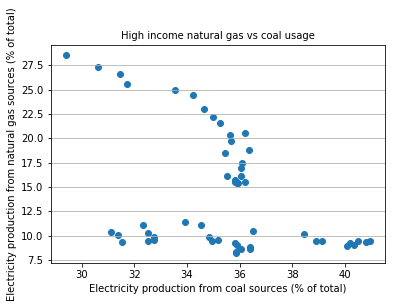

In [64]:
scatter(High_income_coal, High_income_natural_gas, "High income natural gas vs coal usage", "HIC_coal_natural_gas.png")

In [65]:
correlation(World_coal, World_natural_gas)

array([[ 1.        ,  0.91951426],
       [ 0.91951426,  1.        ]])

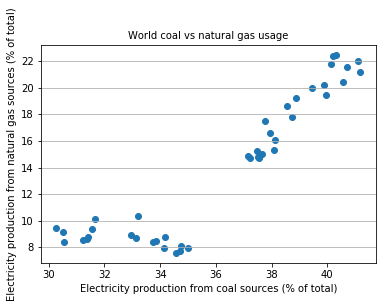

In [66]:
scatter(World_coal, World_natural_gas, "World coal vs natural gas usage", "World_coal_natural_gas.png")

<h3>Low income</h3>

In [67]:
correlation(Low_income_coal, Low_income_hydro)

array([[ 1.        , -0.80163372],
       [-0.80163372,  1.        ]])

In [68]:
correlation(Low_income_coal, Low_income_nuclear)

array([[ 1.        ,  0.84995332],
       [ 0.84995332,  1.        ]])

In [69]:
correlation(Low_income_coal, Low_income_oil)

array([[ 1.        , -0.91759013],
       [-0.91759013,  1.        ]])

In [70]:
correlation(Low_income_coal, Low_income_renewable)

array([[ 1.        ,  0.79556728],
       [ 0.79556728,  1.        ]])

In [71]:
correlation(Low_income_coal, Low_income_natural_gas)

array([[ 1.        ,  0.96150082],
       [ 0.96150082,  1.        ]])

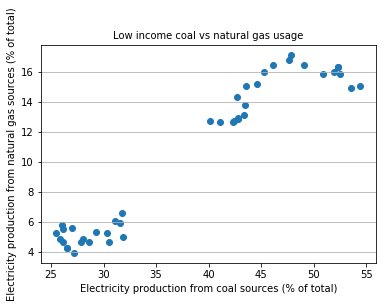

In [72]:
scatter(Low_income_coal, Low_income_natural_gas, "Low income coal vs natural gas usage", "LIC_coal_natural_gas.png")

<p>In low income countries most of the growth in percentage of coal used comes from a decline in oil and hydroelectric power.</p>

In [73]:
High_income_GDP_trunc = data_trunc_below_year(High_income_GDP, 2013)

In [159]:
scatter(High_income_GDP_trunc, High_income_coal, "High income GDP vs coal usage", "HIC_coal_gdp.png")

In [75]:
correlation(High_income_GDP_trunc, High_income_coal)

array([[ 1.       , -0.4979867],
       [-0.4979867,  1.       ]])

In [76]:
Low_income_GDP_trunc = data_trunc_above_year(Low_income_GDP, 1970)

In [77]:
Low_income_GDP_trunc = data_trunc_below_year(Low_income_GDP_trunc, 2013)

In [160]:
scatter(Low_income_GDP_trunc, Low_income_coal, "Low income GDP vs coal usage", "LIC_coal_GDP.png")

In [79]:
correlation(Low_income_GDP_trunc, Low_income_coal)

array([[ 1.       ,  0.8935453],
       [ 0.8935453,  1.       ]])

<p>This is a similar finding. Low income nations have a strong positive correlation between GDP and coal. High income nations have a slightly negative correlation.</p>

<h2> <font color = "blue"> Energy consumption vs coal in High and Low income countries</font></h2>

In [80]:
High_income_consumption_trunc = data_trunc_below_year(High_income_consumption, 2013)

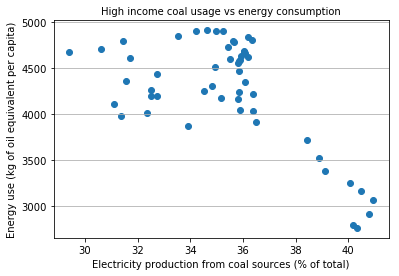

In [81]:
scatter(High_income_coal, High_income_consumption_trunc, "High income coal usage vs energy consumption", "HIC_consumption_coal.png")

In [82]:
correlation(High_income_consumption_trunc, High_income_coal)

array([[ 1.        , -0.63044004],
       [-0.63044004,  1.        ]])

<p>In high income countries greater energy consumption is negatively correlated with percent coal usage</p>

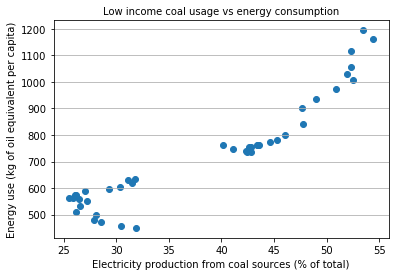

In [83]:
scatter(Low_income_coal, Low_income_consumption, "Low income coal usage vs energy consumption", "LIC_consumption_coal.png")

In [84]:
correlation(Low_income_coal, Low_income_consumption)

array([[ 1.        ,  0.93374557],
       [ 0.93374557,  1.        ]])

<p>In low income countries the opposite is true. As energy consumption increases coal usage increases.</p>

<h2> <font color = "blue"> CO2 emissions vs coal in High and Low income countries</font></h2>

In [85]:
len(High_income_CO2_emissions)

52

In [86]:
len(High_income_coal)

53

In [87]:
High_income_coal_emissions_trunc = data_trunc_below_year(High_income_coal, 2012)

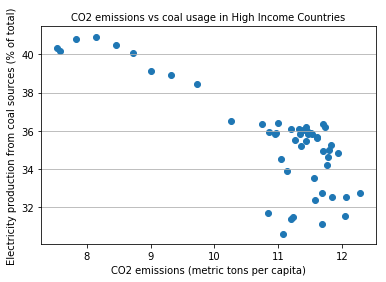

In [88]:
scatter(High_income_CO2_emissions, High_income_coal_emissions_trunc, "CO2 emissions vs coal usage in High Income Countries", "HIC_emissions_coal")

In [89]:
correlation(High_income_CO2_emissions, High_income_coal_emissions_trunc)

array([[ 1.        , -0.78916844],
       [-0.78916844,  1.        ]])

<p>As expected there is a negative relationship between CO2 emissions and coal usage in High Income nations<p>

In [90]:
len(Low_income_CO2_emissions)

52

In [91]:
len(Low_income_coal)

42

In [92]:
Low_income_CO2_emissions_trunc = data_trunc_above_year(Low_income_CO2_emissions, 1970)

In [93]:
Low_income_coal_emissions_trunc = data_trunc_below_year(Low_income_coal, 2012)

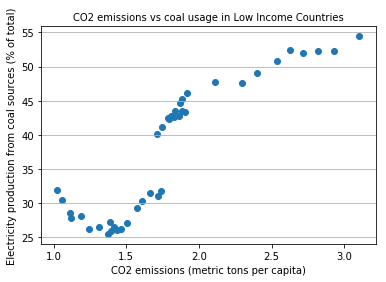

In [94]:
scatter(Low_income_CO2_emissions_trunc, Low_income_coal_emissions_trunc, "CO2 emissions vs coal usage in Low Income Countries",
       "LIC_emissions_coal.png")

In [95]:
correlation(Low_income_CO2_emissions_trunc, Low_income_coal_emissions_trunc)

array([[ 1.        ,  0.89112215],
       [ 0.89112215,  1.        ]])

<p>Once again the relationships are inverted</p>

<h2><font color = "red">Case Studies Comparing Poland and South Africa</font></h2>

<p>For most of the 1960s through 1990s Poland and South Africa had the highest percentage of their energy usage from coal. Since the end of apartheid in the Mid 90s South Africa's GDP has tripled. It has the 41st largest GDP in the world. Poland's economy is even larger, 24th overall. The countries are interesting because as they have become richer their coal production has declined. They are also interesting because they are at different development stages. Poland is a high income country. Whereas, South Africa is a Upper middle income country. In comparing the two, we hope to understand how coal usage changes as income levels rise.</p> 

<h2> <font color="red">Calls</font></h2>

<h3> Poland</h3>

In [111]:
Poland_GDP = create_mask(GDP_call, "POL")
Poland_coal = create_mask(coal_call, "POL")
Poland_oil = create_mask(oil_call, "POL")
Poland_hydro = create_mask(hydro_call, "POL")
Poland_nuclear = create_mask(nuclear_call, "POL")
Poland_natural_gas = create_mask(natural_gas_call, "POL")
Poland_renewable = create_mask(renewable_call, 'POL')
Poland_consumption = create_mask(consumption_call, "POL")
Poland_CO2_emissions = create_mask(emissions_call, "POL")
Poland_articles = create_mask(science_call, "POL")

<h3>South Africa</h3>

In [112]:
South_Africa_GDP = create_mask(GDP_call, "ZAF")
South_Africa_coal = create_mask(coal_call, "ZAF")
South_Africa_oil = create_mask(oil_call, "ZAF")
South_Africa_hydro = create_mask(hydro_call, "ZAF")
South_Africa_nuclear = create_mask(nuclear_call, "ZAF")
South_Africa_natural_gas = create_mask(natural_gas_call, "ZAF")
South_Africa_renewable = create_mask(renewable_call, "ZAF")
South_Africa_consumption = create_mask(consumption_call, "ZAF")
South_Africa_CO2_emissions = create_mask(emissions_call, "ZAF")
South_Africa_articles = create_mask(science_call, "ZAF")

<h2><font color = "blue">Polish energy usage</font></h2>

In [161]:
#Graph of High income energy usage
# Line plot of energy usage in high income countries
plt.plot(Poland_coal['Year'].values, Poland_coal['Value'].values, 'r-', label="Coal")
plt.plot(Poland_nuclear['Year'].values, Poland_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(Poland_oil['Year'].values, Poland_oil['Value'].values, 'k-', label="Oil")
plt.plot(Poland_hydro['Year'].values, Poland_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(Poland_natural_gas['Year'].values, Poland_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(Poland_renewable['Year'].values, Poland_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in Poland')

# to make more honest, start they y axis at 0
plt.axis([1990, 2012,0,100])

plt.savefig("poland_coal.png")

<h2><font color = "blue">Polish GDP vs coal usage</font></h2>


In [114]:
poland_coal_trunc = data_trunc_above_year(Poland_coal, 1989)

In [115]:
poland_gdp_trunc = data_trunc_below_year(Poland_GDP, 2014)

In [163]:
scatter(poland_coal_trunc, poland_gdp_trunc, "Polish GDP vs coal usage since 1990", "Poland_coal_gdp.png")

In [117]:
correlation(poland_gdp_trunc, poland_coal_trunc)

array([[ 1.        , -0.95426319],
       [-0.95426319,  1.        ]])

In [118]:
correlation(Poland_coal, Poland_natural_gas)

array([[ 1.        , -0.85537997],
       [-0.85537997,  1.        ]])

In [119]:
correlation(Poland_coal, Poland_renewable)

array([[ 1.        , -0.89234219],
       [-0.89234219,  1.        ]])

<p>As Poland's GDP has increased it has produced a smaller share of coal. However, it still produces a lot of coal (greater than 80 percent of its energy comes from coal). Like other high income countries, natural gas and renewable energies have negative correlations with coal, but the effect is not as apparent in Poland as it is elsewhere</p>

<h2><font color = "blue">South African energy usage</font></h2>


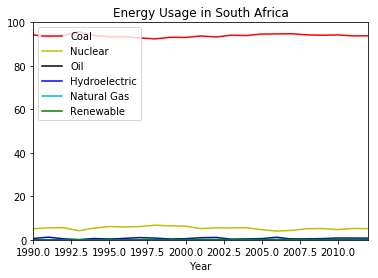

In [120]:
#Graph of High income energy usage
# Line plot of energy usage in high income countries
plt.plot(South_Africa_coal['Year'].values, South_Africa_coal['Value'].values, 'r-', label="Coal")
plt.plot(South_Africa_nuclear['Year'].values, South_Africa_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(South_Africa_oil['Year'].values, South_Africa_oil['Value'].values, 'k-', label="Oil")
plt.plot(South_Africa_hydro['Year'].values, South_Africa_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(South_Africa_natural_gas['Year'].values, South_Africa_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(South_Africa_renewable['Year'].values, South_Africa_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in South Africa')

# to make more honest, start they y axis at 0
plt.axis([1990, 2012,0,100])

plt.show()

<h2><font color = "blue">South African GDP vs coal usage</font></h2>

In [121]:
south_africa_gdp_trunc = data_trunc_below_year(South_Africa_GDP, 2013)

In [122]:
south_africa_gdp_trunc = data_trunc_above_year(south_africa_gdp_trunc, 1970)

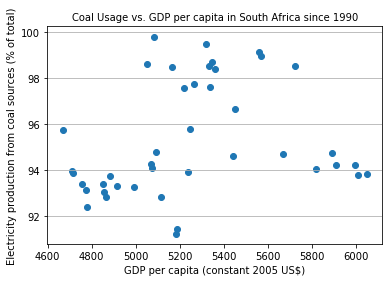

In [123]:
scatter(south_africa_coal_trunc, south_africa_gdp_trunc, "South Africa GDP vs coal usage since 1970", "South_africa_coal_gdp.png"

In [124]:
correlation(south_africa_gdp_trunc, South_Africa_coal)

array([[ 1.       ,  0.2277778],
       [ 0.2277778,  1.       ]])

<p>South Africa does not have a strong relationship between coal and GDP. However, there are some interesting findings in this data. Poland produces no nuclear power. South Africa produces no oil, natural gas, renewable, or hydroelectric power. This indicates the availability of substitutes is a major factor in coal usage. </p>

<h2><font color = "red">Comparing Russia and the United States</font></h2>

<p>Based on the Poland - South Africa comparison, I decided to compare two nations with abundant natural resources - Russia and the United States. As with Poland and Russia, the two nations are in different economic groups. Russia is upper-middle income and the United States is high income. Given each nations abundant natural resources, we should be able to isolate income as a variable more so than before. However, we should note the two nations have very different political and economical structures, which will likely contribute to differences</p>

<h3> USA</h3>

In [125]:
USA_GDP = create_mask(GDP_call, "USA")
USA_coal = create_mask(coal_call, "USA")
USA_oil = create_mask(oil_call, "USA")
USA_hydro = create_mask(hydro_call, "USA")
USA_nuclear = create_mask(nuclear_call, "USA")
USA_natural_gas = create_mask(natural_gas_call, "USA")
USA_renewable = create_mask(renewable_call, "USA")
USA_consumption = create_mask(consumption_call, "USA")
USA_CO2_emissions = create_mask(emissions_call, "USA")
USA_articles = create_mask(science_call, "USA")

<h3>Russia</h3>

In [126]:
Russia_GDP = create_mask(GDP_call, "RUS")
Russia_coal = create_mask(coal_call, "RUS")
Russia_oil = create_mask(oil_call, "RUS")
Russia_hydro = create_mask(hydro_call, "RUS")
Russia_nuclear = create_mask(nuclear_call, "RUS")
Russia_natural_gas = create_mask(natural_gas_call, "RUS")
Russia_renewable = create_mask(renewable_call, "RUS")
Russia_consumption = create_mask(consumption_call, "RUS")
Russia_CO2_emissions = create_mask(emissions_call, "RUS")
Russia_articles = create_mask(science_call, "RUS")

<h2><font color = "blue">USA energy usage</font></h2>

In [172]:
#Graph of High income energy usage
# Line plot of energy usage in high income countries
plt.plot(USA_coal['Year'].values, USA_coal['Value'].values, 'r-', label="Coal")
plt.plot(USA_nuclear['Year'].values, USA_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(USA_oil['Year'].values, USA_oil['Value'].values, 'k-', label="Oil")
plt.plot(USA_hydro['Year'].values, USA_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(USA_natural_gas['Year'].values, USA_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(USA_renewable['Year'].values, USA_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.ylabel('Market share by energy source')
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in USA')

# to make more honest, start they y axis at 0
plt.axis([1960, 2012,0,100])
#plt.show()
plt.savefig("Energy_usage_USA.png")

<h2><font color = "blue">USA natural gas vs coal usage</font></h2>


In [168]:
scatter(USA_coal, USA_natural_gas, "USA natural gas vs coal usage since 1960", "USA_coal_natural_gas.png"

In [130]:
correlation(USA_GDP_trunc, USA_coal)

array([[ 1.        , -0.22312771],
       [-0.22312771,  1.        ]])

In [131]:
correlation(USA_coal, USA_natural_gas)

array([[ 1.        , -0.57549214],
       [-0.57549214,  1.        ]])

In [132]:
correlation(USA_coal, USA_renewable)

array([[ 1.        , -0.41041573],
       [-0.41041573,  1.        ]])

<p>The United States energy usage is more diversified than previous nations. Nevertheless, natural gas is the fastest growing energy source. It recently passed coal as the top energy source in the United States. This is on par with what we saw in high income nations generally earlier. Natural gas is quickly passing coal as the top energy source in high income countries </p>

<h2><font color = "blue">Russian energy usage</font></h2>


In [181]:
#Graph of High income energy usage
# Line plot of energy usage in high income countries
plt.plot(Russia_coal['Year'].values, Russia_coal['Value'].values, 'r-', label="Coal")
plt.plot(Russia_nuclear['Year'].values, Russia_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(Russia_oil['Year'].values, Russia_oil['Value'].values, 'k-', label="Oil")
plt.plot(Russia_hydro['Year'].values, Russia_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(Russia_natural_gas['Year'].values, Russia_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(Russia_renewable['Year'].values, Russia_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in Russia')

# to make more honest, start they y axis at 0
plt.axis([1990, 2012,0,100])
#plt.show()
plt.savefig("Russia_marketshare.png")

<h2><font color = "blue">Russian natural gas vs coal usage</font></h2>

In [134]:
Russia_GDP_trunc = data_trunc_above_year(Russia_GDP, 1989)

In [135]:
Russia_GDP_trunc = data_trunc_below_year(Russia_GDP_trunc, 2013)

In [175]:
scatter(Russia_coal, Russia_natural_gas, "Russian naturalgas vs coal usage since 1990", "Russia_coal_natural_gas.png"

In [137]:
correlation(Russia_GDP_trunc, Russia_coal)

array([[ 1.       , -0.5824408],
       [-0.5824408,  1.       ]])

<p> These two nations are unique in that they are in the top 10 in the world in both coal and natural gas (Canada is too). Interestingly, each nation now uses more natural gas than coal.</p>

<h3>Nigeria</h3>

In [138]:
Nigeria_GDP = create_mask(GDP_call, "NGA")
Nigeria_coal = create_mask(coal_call, "NGA")
Nigeria_oil = create_mask(oil_call, "NGA")
Nigeria_hydro = create_mask(hydro_call, "NGA")
Nigeria_natural_gas = create_mask(natural_gas_call, "NGA")
Nigeria_nuclear = create_mask(nuclear_call, "NGA")
Nigeria_renewable = create_mask(renewable_call, "NGA")
Nigeria_consumption = create_mask(consumption_call, "NGA")
Nigeria_CO2_emissions = create_mask(emissions_call, "NGA")
Nigeria_articles = create_mask(science_call, "NGA")

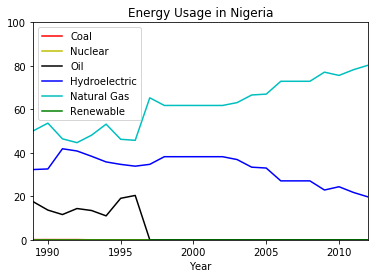

In [139]:
# Line plot of energy usage in high income countries
plt.plot(Nigeria_coal['Year'].values, Nigeria_coal['Value'].values, 'r-', label="Coal")
plt.plot(Nigeria_nuclear['Year'].values, Nigeria_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(Nigeria_oil['Year'].values, Nigeria_oil['Value'].values, 'k-', label="Oil")
plt.plot(Nigeria_hydro['Year'].values, Nigeria_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(Nigeria_natural_gas['Year'].values, Nigeria_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(Nigeria_renewable['Year'].values, Nigeria_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in Nigeria')

# to make more honest, start they y axis at 0
plt.axis([1989, 2012,0,100])

plt.show()

<p> Nigeria is another country rich in natural gas. It does not use any coal </p>

In [140]:
India_GDP = create_mask(GDP_call, "IND")
India_coal = create_mask(coal_call, "IND")
India_oil = create_mask(oil_call, "IND")
India_hydro = create_mask(hydro_call, "IND")
India_natural_gas = create_mask(natural_gas_call, "IND")
India_nuclear = create_mask(nuclear_call, "IND")
India_renewable = create_mask(renewable_call, "IND")
India_consumption = create_mask(consumption_call, "IND")
India_CO2_emissions = create_mask(emissions_call, "IND")
India_articles = create_mask(science_call, "IND")

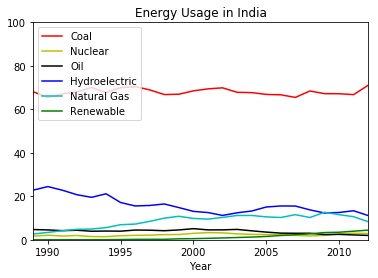

In [141]:
# Line plot of energy usage in high income countries
plt.plot(India_coal['Year'].values, India_coal['Value'].values, 'r-', label="Coal")
plt.plot(India_nuclear['Year'].values, India_nuclear['Value'].values, 'y-', label="Nuclear") 
plt.plot(India_oil['Year'].values, India_oil['Value'].values, 'k-', label="Oil")
plt.plot(India_hydro['Year'].values, India_hydro['Value'].values, 'b-', label="Hydroelectric")
plt.plot(India_natural_gas['Year'].values, India_natural_gas['Value'].values, 'c-', label="Natural Gas")
plt.plot(India_renewable['Year'].values, India_renewable['Value'].values, 'g-', label="Renewable")

# Label the axes
plt.xlabel('Year')
plt.legend(loc="upper left")

#label the figure
plt.title('Energy Usage in India')

# to make more honest, start they y axis at 0
plt.axis([1989, 2012,0,100])

plt.show()

<p> India is rich in coal, but has little natural gas. It uses mostly coal. </p>